# Palmer Penguins

My analysis of the Palmer Penguins dataset. For this analysis I will be using data imported from the Seaborn repository on Github.

![Palmer Penguins artwork](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
Artwork by @allison_horst

To begin my analysis I first had to import the following modules:
* Pandas for storing, manipulating and working with structured data.
* Numpy for working with arrays and carrying out mathematical operations
* Matplotlib.pyplot for creating plots.

I then downloaded the Palmer Penguins dataset from the seaborn repository on GitHub.

In [1]:
# Data Frames
import pandas as pd

#numpy
import numpy as np

#Plotting
import matplotlib.pyplot as plt

In [2]:
#Load the penguins dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Next, I spent some time studying the dataset to get an overview of the different variables, and their types.

In [3]:
#Lets have a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


After getting a summary of the data, I took the necessary steps to clean it. Upon inspecting the DataFrame with df.info(), I noticed varying counts of non-null entries across different variables, signaling the presence of null values in the dataset.

To address this issue, I counted the null values for each variable and opted to remove rows containing any null values. Given the ample amount of data available, I determined that this approach would have minimal impact on the integrity of my analysis.

In [5]:
#Count how many null values in each variable
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
#Remove all columns with null values
df.dropna(inplace=True)

## Overview of the Dataset

The Palmer Penguins dataset contains information about three penguin species observed on three islands in the Palmer Archipelago in Antarctica.

The data was collected between 2007 and 2009 by Dr. Kristen Gormen for the Palmer Station Long Term Ecological Research Program.

The data was collected as part of research to study Antarctic penguins’ foraging behavior and its relationship with environmental variability.

## Overview of the Variables
### Variable 1: Species
This variable identifies the species of the penguin.
There are only three possible inputs within the species variable:
* Adelie
* Chinstrap 
* Gentoo

The best data type for this variable is a string because 'species' represents categorical data. Categorical data consists of discrete categories or groups, and using strings allows us to represent these categories accurately. Each species name is a distinct label, and using strings ensures the data remains categorical, allowing for simple interpretation and analysis.

### Variable 2: Island
This variable tells us which island the penguin was spotted on.
There are only three posible outputs for this variable also:
* Biscoe
* Dream
* Torgersen

Similar to Species, the best variable type for this dataset is string.

### Variables 3 & 4: Bill Length and Bill Depth
The culmen is the upper ridge of a penguin's bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm for clarity. These variables measure, in millimeters, the dimensions of the penguin's bill. 

The most appropriate data type for these variables is floats, as it allows for precise representation of numerical measurements with decimal points. Bill length & depth are continuous quantitative variables that can take on a wide range of numerical values, including decimals. Using floats ensures that the dataset accurately reflects the variability in bill length among penguins. It allows for precise calculations, without losing information due to rounding or truncation.

For this penguin data, the culmen (bill) length and depth are measured as shown below:

![Bill Diagram](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

Artwork by @allison_horst

### Variable 5: Flipper Length
This quantitative variable measures the length of the penguin's flipper in millimeters.

The most appropriate data type for this variable is integer, which is measured in this dataset in whole units (mm). It would also be possible to use floats for this variable, however by using integers, you avoid unnecessary decimal places, which can be misleading in this context. Additionally, integers are well-suited for arithmetic operations and statistical analyses involving counts or discrete measurements.

![Anatomy of a Penguin](https://img.freepik.com/premium-vector/illustrator-body-parts-penguin_65947-757.jpg)

Source:Freepik.com

### Variable 6: Body mass 
This variable measures the mass of each penguin in grams.
Similar to Flipper length the most appropriate variable for this data type is also integer, due to all results being positive, whole numbers.

### Variable 7: Sex
This variable measures the sex of the penguins, whether they are male or female.
The best data type for this variable, in this analysis, is a String. It would also be possible to use Booleans here, as there are only 2 options for the variable.

While some analyses of this dataset also include the year the data was collected, the data found on the Seaborn repositary does not contain this variable and thus, it will not be included in this analysis.

## Amount of Each Species Spotted

I have been asked to create a bar chart of an appropriate variable. In this case I chose to create a bar chart representing the amount of each species spotted in the course of the study. To do this I first counted the amount of each species and stored it in the variable species_amount. I then used matplotlib.pyplot to create a bar chart of this data.

In [7]:
#count how many of each species there are
species_amount = df['species'].value_counts()
species_amount

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

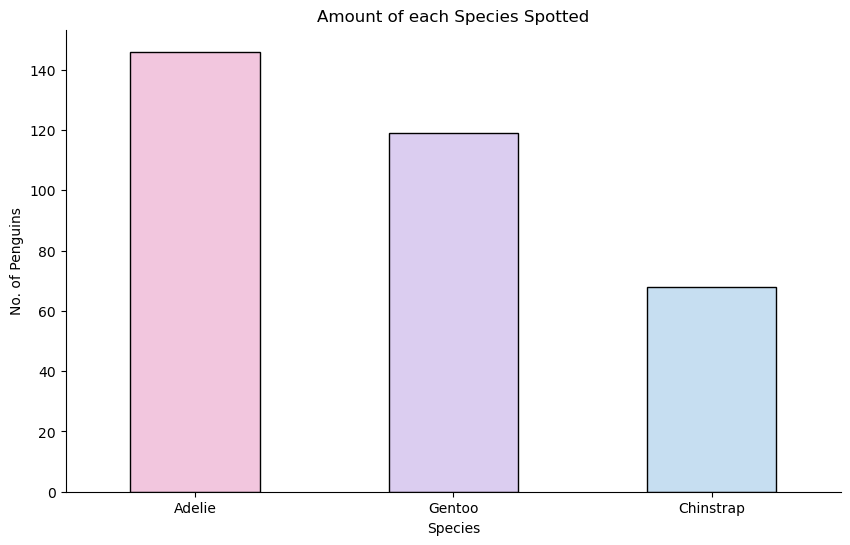

In [8]:
#put it in a bar chart
plt.figure(figsize=(10, 6)) # make it bigger
species_amount.plot(kind = 'bar', color = ['#F2C6DE', '#DBCDF0', '#C6DEF1'], edgecolor='black')
plt.ylabel("No. of Penguins") 
plt.xlabel("Species")
plt.xticks(rotation=0) #straighten bottom labels
plt.title("Amount of each Species Spotted")
plt.gca().spines['top'].set_visible(False) #remove line a top
plt.gca().spines['right'].set_visible(False) # reove line on right


## Penguin Body Mass

My next task is to create a histogram of an appropriate variable. In this case I chose to create a histogram representing the body mass of the penguins. To do this I created a variable name for body mass and then used matplotlib.pyplot to creat a histogram, adding some styling elements to improve readability.

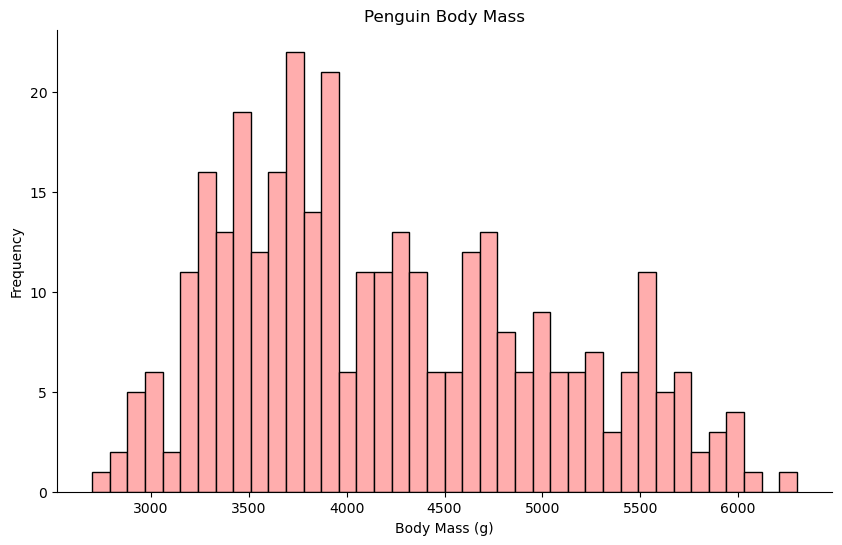

In [9]:
#make a histogram
body_mass = df['body_mass_g']

plt.figure(figsize=(10, 6)) # make it bigger
plt.hist(body_mass, color='#FFADAD', bins=40, edgecolor='black',)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Penguin Body Mass')
plt.gca().spines['top'].set_visible(False) #remove line on top
plt.gca().spines['right'].set_visible(False) #remove line on right

## An Analysis of Flipper Length vs. Body Mass

This dataset shows a positive correlation between flippr length and body mass. This means thatthe larger penguins geneally have longer flippers. Thisindicates that bigger penguins need bigger flippers.

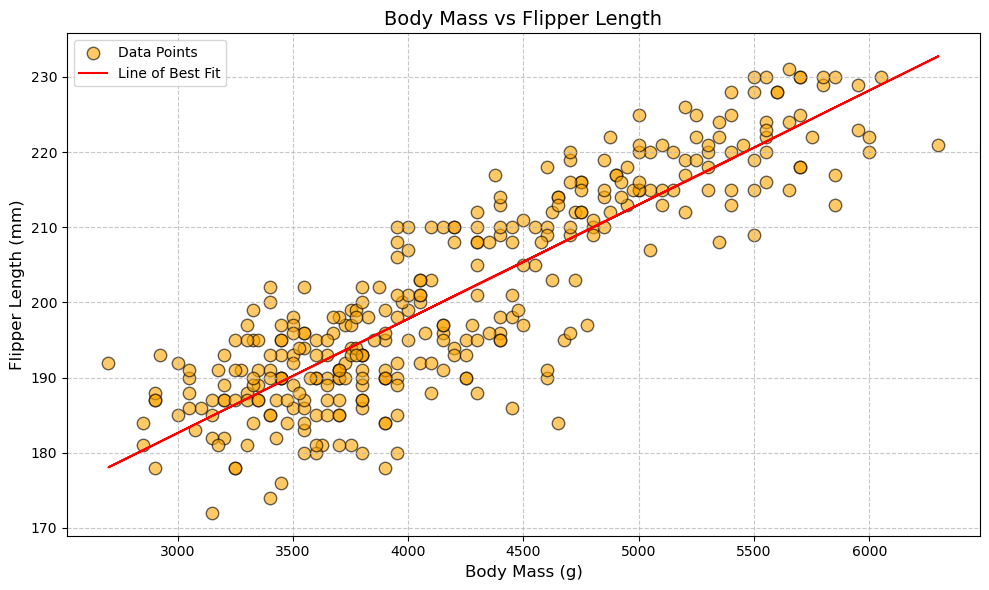

In [10]:
# get the body weight and flipper length from the data, convert to numpy 
bweight = df['body_mass_g']
flength = df['flipper_length_mm']

#Use the stateful approach
fig, ax = plt.subplots(figsize=(10,6))

#fit a straight line between x and y
m, c = np.polyfit(bweight, flength, 1)

#plot it and make it pretty
ax.scatter(bweight, flength, color='orange', alpha=0.6, s=80, edgecolor='black', label='Data Points')
ax.plot(bweight, m * bweight + c, color = 'red', label='Line of Best Fit') # plot the line of best fit
ax.set_xlabel('Body Mass (g)', fontsize=12)
ax.set_ylabel('Flipper Length (mm)', fontsize=12)
ax.set_title('Body Mass vs Flipper Length', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7) #add graph lines
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
ax.legend()
fig.tight_layout()



In [11]:
#Find descriptive statstics for flipper length
df['flipper_length_mm'].describe()

count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [12]:
#Find descriptive statistics for Body Mass
df['body_mass_g'].describe()

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [17]:
#Find the correlation coefficient of flipper length vs body mass
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

print("Correlation coefficient between flipper length and body mass:", correlation)

Correlation coefficient between flipper length and body mass: 0.872978898565361


In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
#describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Sources

1. Medium article - https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d
2. UC Irvine - https://archive.ics.uci.edu/dataset/690/palmer+penguins-3
3. Data Campy - https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python
4. Allison Horst - https://allisonhorst.github.io/palmerpenguins/articles/intro.html#more
5. W3 Schools - https://www.w3schools.com/python/pandas/ref_df_dropna.asp
6. Analytics Vidhya - https://www.analyticsvidhya.com/blog/2021/05/data-types-in-python/
7. Saturn Cloud - https://saturncloud.io/blog/how-to-calculate-pandas-correlation-of-one-column-against-all-others/#:~:text=Calculating%20Correlation%20in%20Pandas&text=The%20corr()%20function%20calculates,most%20commonly%20used%20correlation%20coefficient.




***
### END